In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [403]:
def import_csv_files(path):
    
    csv_files = glob.glob(path + "/*.csv")

    df_list = (pd.read_csv(file) for file in csv_files)

    data = pd.concat(df_list, axis = 0)
    
    print(f'You have a dataset of {df.shape[1]} features for {df.shape[0]} rows.')
    
    return data

In [404]:
df = import_csv_files('data')

You have a dataset of 59 features for 3483 rows.


In [405]:
df.head(3)

,id,object,annonce_id,agency_id,agency_page,agency_contact_name,agency_img_url,agency_phone_number,agency_has_email,agency_link,address,area,bedrooms_count,business_unit,contact_is_private_seller,contact_email,description,district,estate_type,estate_type_id,highlighting_level,insee_code,is_exclusive,is_redirected,is_expired,latitude,longitude,monthly_price,main_picture,nature,postal_code,position,picture_count,price,price_per_meter,photos,price_decrease_percent,publication_id,pricing_price_note,ref,rooms,short_description,transaction_type,title,tags,url,video_url,virtual_visit_url,collected_at,input_url,input_max_pages,input_annonce_details
0,3204208,result,200749259,193229,/professionnels/agences-immobilieres/lyon-3eme...,Keller Williams Abondance,https://v.seloger.com/s/width/150/logos/0/t/u/...,07 69 27 36 43,t,http://abondance.kwimmo.fr/,Lyon 1er,18.999023,0,1,f,t,NaN,Croix Paquet,Studio,1,1,NaN,t,NaN,f,NaN,NaN,888,NaN,1,69001,16,7,175000,9211.0,https://v.seloger.com/s/crop/341x256/visuels/1...,NaN,30193229,NaN,NaN,1,Appartement à vendre - Studio- 1 pièce - 19 m²...,2,NaN,"1 pièce, 19 m²",https://www.seloger.com/annonces/achat/apparte...,NaN,https://my.matterport.com/show/?m=cQpwASrd8FN,18 Apr 2023 06:43:10,https://www.seloger.com/list.htm?projects=2&ty...,398,f
1,3213503,result,200558875,508226,/professionnels/agents-commerciaux/lyon-2eme-a...,TROMPILLE JULIEN BSK IMMOBILIER,https://v.seloger.com/s/width/150/logos/1/n/0/...,06 48 12 66 75,t,https://bskimmobilier.com/commercial-immobilie...,Lyon 1er,42.999855,0,1,f,t,NaN,Terreaux,Appartement,1,1,NaN,f,NaN,f,NaN,NaN,1499,NaN,1,69001,12,7,297000,6907.0,https://v.seloger.com/s/crop/341x256/visuels/1...,NaN,30508226,NaN,NaN,2,"Appartement à vendre - Rue Pizay, à 2min du mé...",2,NaN,"2 pièces, 1 chambre, 43 m², Étage 5/6",https://www.seloger.com/annonces/achat/apparte...,NaN,NaN,18 Apr 2023 06:47:42,https://www.seloger.com/list.htm?projects=2&ty...,398,f
2,3223829,result,201195143,50807,/professionnels/agences-immobilieres/lyon-5eme...,NESTENN LYON 5,https://v.seloger.com/s/width/150/logos/1/k/t/...,04 86 11 09 09,t,http://www.immobilier-lyon-5@nestenn.com/,Lyon 9ème,25.717703,0,1,f,t,NaN,NaN,Studio,1,1,NaN,t,NaN,f,NaN,NaN,658,NaN,1,69009,23,3,129000,5016.0,https://v.seloger.com/s/crop/341x256/visuels/0...,NaN,30050807,NaN,NaN,1,Appartement à vendre - NOUVEAU- Appartement T1...,2,NaN,"1 pièce, 26 m², Étage 0/1",https://www.seloger.com/annonces/achat/apparte...,NaN,NaN,18 Apr 2023 06:44:06,https://www.seloger.com/list.htm?projects=2&ty...,398,f


In [406]:
features_to_delete = ['id','object', 'annonce_id', 'agency_id', 'agency_page', 'agency_contact_name', 'agency_img_url',
        'agency_phone_number', 'agency_has_email', 'agency_link', 'contact_email', 'description', 'is_redirected',
        'is_expired', 'latitude', 'longitude', 'picture_count', 'photos', 'price_decrease_percent', 'publication_id',
        'pricing_price_note', 'ref', 'title', 'url', 'video_url', 'virtual_visit_url', 'collected_at', 'input_url',
        'input_max_pages', 'input_annonce_details','main_picture','transaction_type', 'short_description', 
             'price_per_meter', 'is_exclusive', 'monthly_price', 'nature', 'estate_type_id', 
              'highlighting_level', 'address', 'bedrooms_count','rooms', 'contact_is_private_seller','business_unit'
              , 'insee_code','position']

In [407]:
def delete_features_and_duplicates(dataframe, list_of_features):
    dataframe.drop(list_of_features, axis = 1, inplace = True)
    dataframe.drop_duplicates(inplace = True, ignore_index = True)

In [408]:
delete_features_and_duplicates(df, features_to_delete)

In [409]:
#function to see all the unique features that have the column tags

def unique_flat_features(dataframe, column, seperator):
     
    words = ''
    for data in dataframe[column]:
        words = words + data + ","

    unique = []
    for word in words.split(","):
        if word not in unique:
            unique.append(word)

    unique.sort(reverse=True)
    print(unique)

In [410]:
#unique_flat_features(df, 'tags', ',')

In [411]:
#list of the features we found in 'tags'
#rooms and area are already in the data, so I do not keep them 

tag_features = {'pièce': 'rooms', 'balcon':'balcony', 'ascenseur':'elevator', 
                 'terrasse':'terrace', "étage" : 'floor', 'jardin' : "garden", 
                 'garage' : 'garage','parking' : 'parking_spot', 'box' : 'box' }

In [412]:
#now I create separeted columns for each feature found in tags

def split_tags_column(features, dataframe, column_to_split ):
    
    for feature in features :
        list_temp = []

        for data in dataframe[column_to_split] :
            if feature.lower() in data.lower() :
                
                splited_data = data.split(",")
                    
                for element in splited_data:
                    if feature.lower() in element.lower():
                            
                        list_temp.append(element)
            else :
                list_temp.append(None)
                
        dataframe[features[feature]] = list_temp
        
    dataframe.drop([column_to_split], axis = 1, inplace = True)

In [413]:
split_tags_column(tag_features, df, 'tags')

In [414]:
df.head(3)

,area,district,estate_type,postal_code,price,rooms,balcony,elevator,terrace,floor,garden,garage,parking_spot,box
0,18.999023,Croix Paquet,Studio,69001,175000,1 pièce,None,None,None,None,None,None,None,None
1,42.999855,Terreaux,Appartement,69001,297000,2 pièces,None,None,None,Étage 5/6,None,None,None,None
2,25.717703,NaN,Studio,69009,129000,1 pièce,None,None,None,Étage 0/1,None,None,None,None


In [415]:
#creating 3 categories of floor
#Ground floor, Last floor, or Neither

def categorize_floors(dataframe):
    
    list_floor = []

    for floor in df['floor'] :

        if floor == None :
            list_floor.append('Other')
        elif (str(floor.replace('Étage ',''))[1] == '0'):
            list_floor.append('Ground Floor')
        elif (str(floor.replace('Étage ',''))[1] == str(floor.replace('Étage ',''))[3]) :
            list_floor.append('Last Floor')
        else :
            list_floor.append('Other')
            
    df['floor'] = list_floor

In [416]:
categorize_floors(df)

In [417]:
#Converting the areas from float to integers


df['area'] = df['area'].values.round()

In [418]:
#I want to use the estate_type column to know if the flat is new or not

def is_flat_new(dataframe):
    
    list_new = []
    
    for estate_type in dataframe['estate_type']:
        if 'neuf' in estate_type.lower() :
            
            list_new.append(True)
        
        else : 
            
            list_new.append(False)

    dataframe['new_flat'] = list_new
    dataframe.drop(['estate_type'], axis = 1, inplace = True)
    

In [419]:
is_flat_new(df)

In [420]:
#list of all features I will keep on True/False option
list_t_f_features = ['balcony', 'elevator', 'garden', 'terrace', 'garage', 'box', 'parking_spot']

In [421]:
#if a value is already existing, it is True, if not it is False

def true_false(dataframe, column) :
    dataframe[column] = dataframe[column].notnull().astype(bool)
    dataframe[column] = dataframe[column].fillna(False)

In [422]:
for feature in list_t_f_features :
    true_false(df, feature)
    

In [423]:
#merging box and garage
df['garage'] = df['garage'] | df['box'] 

df = df.drop(['box'], axis = 1)

In [424]:
df.head(3)

,area,district,postal_code,price,rooms,balcony,elevator,terrace,floor,garden,garage,parking_spot,new_flat
0,19.0,Croix Paquet,69001,175000,1 pièce,False,False,False,Other,False,False,False,False
1,43.0,Terreaux,69001,297000,2 pièces,False,False,False,Other,False,False,False,False
2,26.0,NaN,69009,129000,1 pièce,False,False,False,Ground Floor,False,False,False,False


In [425]:
#area and district still have missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          3484 non-null   float64
 1   district      2606 non-null   object 
 2   postal_code   3498 non-null   int64  
 3   price         3498 non-null   int64  
 4   rooms         3498 non-null   object 
 5   balcony       3498 non-null   bool   
 6   elevator      3498 non-null   bool   
 7   terrace       3498 non-null   bool   
 8   floor         3498 non-null   object 
 9   garden        3498 non-null   bool   
 10  garage        3498 non-null   bool   
 11  parking_spot  3498 non-null   bool   
 12  new_flat      3498 non-null   bool   
dtypes: bool(7), float64(1), int64(2), object(3)
memory usage: 188.0+ KB


In [426]:
#area has very few missing data, I can drop those few rows

df.dropna(subset=['area'], inplace = True)

In [427]:
#deleting the eventual rows that have '0 pièce' for the number of rooms 

df = df.loc[df['rooms']!='0 pièce']

In [428]:
#I am filling the Nan of the District column, using the latest non-Nan value for District

#Since the dataframe will be sorted by postal code, the probability to have the good district 
#or at least one nearby seems good

def fill_na_district(dataframe):
    
    dataframe.sort_values(['postal_code'], inplace = True)
    dataframe['district'].fillna(method='bfill', inplace = True)
    dataframe.drop(['postal_code'], axis = 1, inplace = True)
    dataframe.sort_values('price')
    dataframe.reset_index(inplace = True, drop = True)

In [429]:
fill_na_district(df)

 ## Encoding

In [396]:
from sklearn.preprocessing import LabelEncoder

In [397]:
encoder = LabelEncoder()

In [398]:
#columns with 2 values 

for data in df[['balcony', 'elevator', 'terrace', 'garden', 'garage', 'parking_spot', 'new_flat']]:
    df[data] = encoder.fit_transform(df[data])

In [399]:
#columns with more than 2 values

for data in df[['district', 'rooms', 'floor']]:
    df = df.join(pd.get_dummies(df[data])).drop([data], axis = 1)

<Axes: xlabel='price', ylabel='Count'>

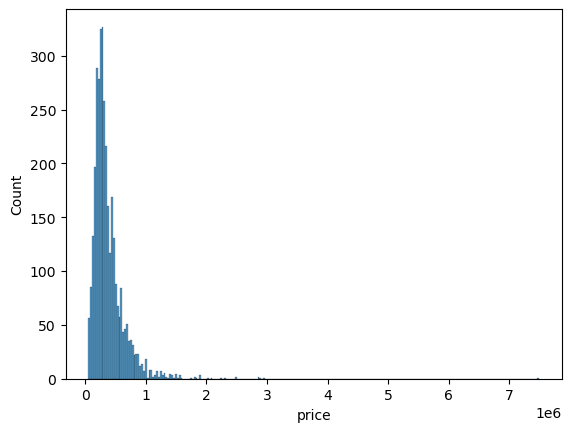

In [400]:
sns.histplot(df['price'])

In [401]:
# I only keep the prices (the target value) that have at least 50 occurences

final_df = df[df['price'] < 600000]
final_df

,area,price,balcony,elevator,terrace,garden,garage,parking_spot,new_flat,Bellecour-Ainay,Champvert-Point du Jour-Saint Irénée,Cordeliers-Célestins-Bourse,Croix Paquet,Croix Rousse-Centre,Croix Rousse-Gros Caillou,Fourvière-Saint Just,Gerland,Gorge du Loup-Champvert,Jean Macé,La Duchère,La Guillotière Nord,La Guillotière Sud,La Plaine,Laënnec-Mermoz,Le Grand Trou,Les Brotteaux-Bellecombe-Masséna,Monplaisir-Le Bachut,Montchat,Moulin à Vent-Ernest Renan,Parilly-Jules Guesde,Part Dieu,Perrache-Le Confluent,Plateau de la Croix Rousse-Ouest,Plateau de la Croix Rousse-Saône,Point du Jour-Ménival,Saint Rambert,Saint Vincent,Sans Souci-Dauphiné,Terreaux,Transvaal,Tête d'Or-Foch-Vitton,Vaise-Rochecardon-Industrie,Vieux Lyon,Villette,États-Unis,1 pièce,10 pièces,11 pièces,2 pièces,3 pièces,4 pièces,5 pièces,6 pièces,7 pièces,8 pièces,9 pièces,Ground Floor,Last Floor,Other
0,19.0,175000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,87.0,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,37.0,249000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,48.0,368000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,52.0,230000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,35.0,157000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3479,62.0,270000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3480,60.0,369000,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3481,90.0,279000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


## Machine Learning Model

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
seed = 42

In [346]:
X = final_df.drop(['price'], axis = 1)
y = final_df['price']

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, train_size=0.8, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=seed)

print(X.shape, y.shape)

(3033, 58) (3033,)


In [356]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [358]:
r_forest = RandomForestRegressor()

r_forest.fit(X_train, y_train)

RandomForestRegressor()

In [364]:
mean_absolute_error(r_forest.predict(X_val), y_val)

43121.26554971504

In [365]:
mean_absolute_error(r_forest.predict(X_test), y_test)

44202.73746575482

## Export of the model

In [366]:
import pickle

In [367]:
pickle.dump(r_forest, open('model.pkl', 'wb'))